In [1]:
import benchmax.evaluation as ev
import pandas
import matplotlib.pyplot as plt
import tikzplotlib

stats = ev.csv_to_pandas('stats_qe_24-02-07_13:43.csv', rename = {'qe-tools-wrapper/tarski_wrapper.py':'qepcad', 'qe-tools-wrapper/redlog_wrapper.py':'redlog', 'smtrat/build/smtrat-qe': 'smtrat'})

stats[('smtrat','output_amount_atoms')] = stats[('smtrat','qe_coverings_output_amount_atoms')]
stats[('smtrat','output_amount_and')] = stats[('smtrat','qe_coverings_output_amount_and')]
stats[('smtrat','output_amount_or')] = stats[('smtrat','qe_coverings_output_amount_or')]
stats.loc[(stats[('smtrat','answer')]=='timeout'), ('smtrat','output_amount_atoms')] = None
stats.loc[(stats[('smtrat','answer')]=='timeout'), ('smtrat','output_amount_and')] = None
stats.loc[(stats[('smtrat','answer')]=='timeout'), ('smtrat','output_amount_or')] = None

ev.setup_accessible_styles()

/home/jnalbach/.local/lib/python3.10/site-packages/benchmax/evaluation/load.py:89: FutureWarning: inplace is deprecated and will be removed in a future version.
  df.columns.set_levels(map(lambda x: name_map[x] if x in name_map else x, df.columns.levels[0]) , level=0, inplace=True)


## General

In [2]:
ev.inspect_answer(stats)

smtrat  qepcad  redlog
count                   78      78      78
sat                     47      38      51
unsat                    6       6       6
unknown                  0      25       0
wrong                    0       0       0
error                    0       0       0
timeout                 25       9      21
memout                   0       0       0
no answer                0       0       0
segmentation fault       0       0       0
segfault                 0       0       0
abort                    0       0       0
invalid                  0       0       0
parsererror              0       0       0
nosuchfile               0       0       0
solved                  53      44      57

In [3]:
plot = ev.performance_profile(stats,['smtrat','qepcad','redlog'])
plot.axes.legend(['CAlC','QEPCAD B','Redlog'])
#plot.set_xlim(3720,3825)
plot.set_ylabel('running time (s)')
#tikzplotlib.save('results_qe.tex',axis_width='5cm',axis_height='7cm')

Text(0, 0.5, 'running time (s)')

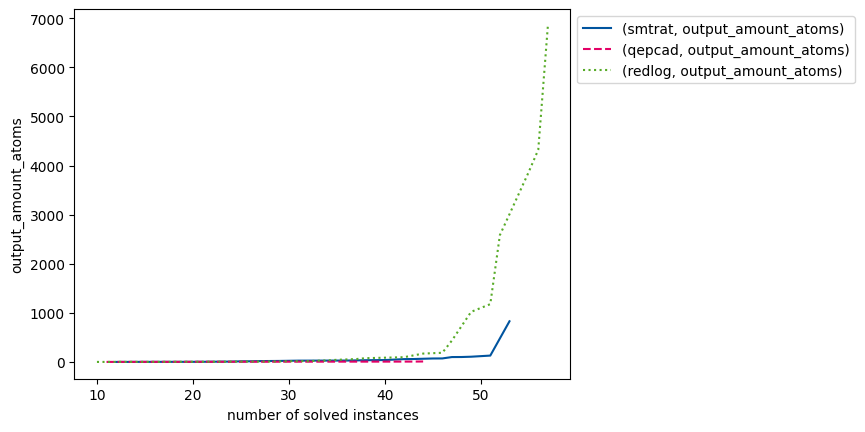

In [4]:
plot = ev.performance_profile(stats,ev.get_solvers(stats),'output_amount_atoms')
plot.axes.legend(bbox_to_anchor=(1,1))
#plot.axes.set_yscale('log')

Text(0, 0.5, 'CAlC')

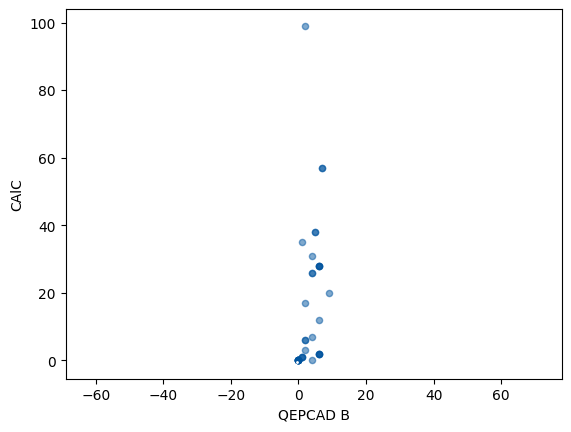

In [5]:
ax = ev.scatter_plot(stats, 'qepcad', 'smtrat', 'output_amount_atoms', True)

ev.scatter_axis_equal(ax)
ax.set_xlabel('QEPCAD B')
ax.set_ylabel('CAlC')

#tikzplotlib.save('smtrat_qepcad.tex',axis_width='2cm',axis_height='7cm')


In [6]:
ax = ev.scatter_plot(stats, 'smtrat', 'redlog', 'output_amount_atoms', True)
ax.set_ylabel('Redlog')
ax.set_xlabel('CAlC')
ev.scatter_axis_equal(ax)

#tikzplotlib.save('smtrat_redlog.tex',axis_width='2cm',axis_height='7cm')


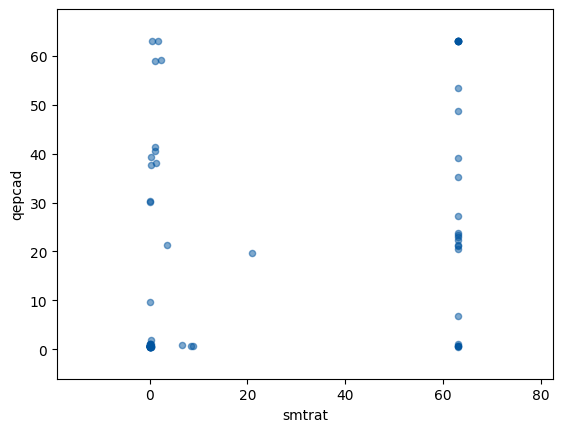

In [7]:
ax = ev.scatter_plot(stats, 'smtrat', 'qepcad', 'runtime')
ev.scatter_axis_equal(ax)